<a href="https://colab.research.google.com/github/inrok86/cbpc/blob/main/scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'%mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'%r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


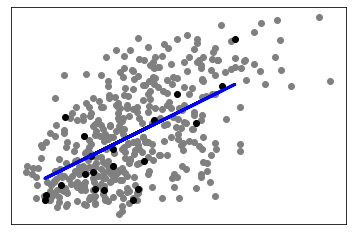

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='gray')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Princial component decomposition

In [ ]:
from sklearn.decomposition import PCA
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)

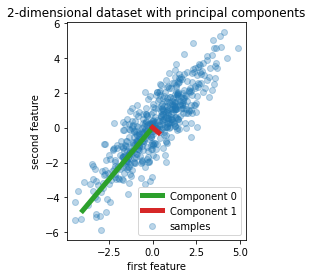

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()

# Classification(K-means clustering)

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [ ]:
data[24]

array([ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
        1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0.,
       13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0.,
        0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

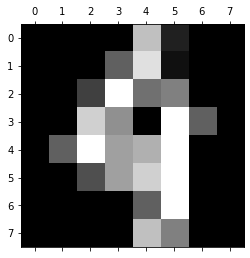

In [ ]:
plt.gray() 
plt.matshow(data[24].reshape(8,8)) 
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
print(kmeans.cluster_centers_)

[[-22.02179115   5.5986362 ]
 [  9.57508552 -19.20626115]
 [ 15.92799036  13.04600513]
 [-13.86920549  -7.14723947]
 [  4.15841049  -8.23584749]
 [  1.43194235  21.56387919]
 [-12.97239272  11.31875966]
 [ 22.57855849  -0.10172268]
 [ -3.63939732 -17.07568564]
 [ -3.6185758    0.59632509]]


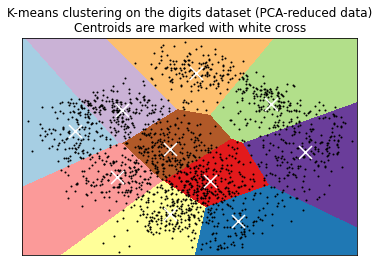

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# MLP Classifier

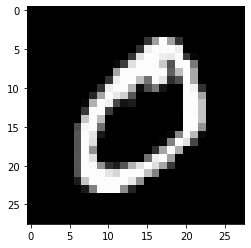

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
plt.imshow(X_train[1].reshape(28,28)*256)

'9'

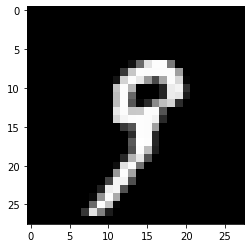

In [ ]:
plt.imshow(X_train[19].reshape(28,28)*256)
y_train[19]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, 
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.33347839
Iteration 2, loss = 0.15302157
Iteration 3, loss = 0.11205266
Iteration 4, loss = 0.09200627
Iteration 5, loss = 0.07836774
Iteration 6, loss = 0.06847753
Iteration 7, loss = 0.06074761
Iteration 8, loss = 0.05340344
Iteration 9, loss = 0.04971006
Iteration 10, loss = 0.04471309
Iteration 11, loss = 0.04029144
Iteration 12, loss = 0.03544515
Iteration 13, loss = 0.03363520
Iteration 14, loss = 0.03028086
Iteration 15, loss = 0.02756275
Iteration 16, loss = 0.02525301
Iteration 17, loss = 0.02279338
Iteration 18, loss = 0.02167902
Iteration 19, loss = 0.01781972
Iteration 20, loss = 0.01497305


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

Training set score: 0.996883
Test set score: 0.972900


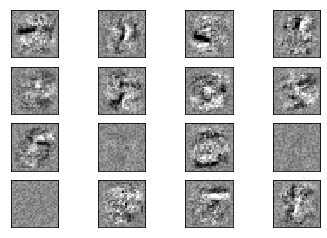

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [ ]:
y_pred=mlp.predict(X_test)

4


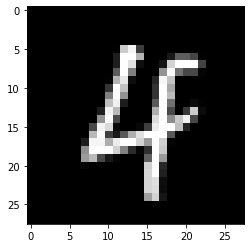

In [ ]:
idx=166
print(y_pred[idx])
plt.imshow(X_test[idx].reshape(28,28)*256)